In [1]:
# project: p9
# submitter: Kmconrad3
# partner: Akroubal
# hours: 7

In [2]:
import csv
import copy 
import matplotlib
import pandas

#allows you to render matplotlib graphs in the same notebook
%matplotlib inline 

def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

In [3]:
def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    exampleFile.close()
    return exampleData

#use process_csv to pull out the header and data rows
csv_rows = process_csv("movies.csv")
csv_header = csv_rows[0]
csv_data = csv_rows[1:]

#for mapping.csv
csv_rows2 = process_csv("mapping.csv")
csv_header2 = csv_rows2[0]
csv_data2 = csv_rows2[1:]

In [4]:
def get_mapping(path):
    listofnames = {}
    datamess=process_csv(path)
    for i in range(len(datamess)): 
            listofnames[datamess[i][0]] = datamess[i][1]
    return listofnames

In [5]:
def get_raw_movies(path):
    movies = []
    bcsv = process_csv(path)
    header = bcsv[0]
    bcsv_data = bcsv[1:]
    for i in range(len(bcsv_data)):
        moviedict = {}
        moviedict['title'] = bcsv_data[i][0]
        moviedict['year'] = int(bcsv_data[i][1])
        moviedict['genres'] = bcsv_data[i][2].split(', ')
        moviedict['duration'] = int(bcsv_data[i][3])
        moviedict['directors'] = bcsv_data[i][4].split(', ')
        moviedict['actors'] = bcsv_data[i][5].split(', ')
        moviedict['rating'] = float(bcsv_data[i][6])
        movies.append(moviedict)
    return movies

In [6]:
def get_movies(movies_path, mapping_path):
    tofill=get_raw_movies(movies_path)
    codename=get_mapping(mapping_path)
    for i in range(len(tofill)):
        j=0
        k=0
        if tofill[i]['title'][0:2]=='tt':
            tofill[i]['title']=codename[tofill[i]['title']]
        for act in tofill[i]['directors']:
            if act[0:2] =='nm':
                tofill[i]['directors'][j]=codename[act]
                j+=1
        for act in tofill[i]['actors']:
            if act[0:2] =='nm':
                tofill[i]['actors'][k]=codename[act]
                k+=1   
    return tofill

In [7]:
#q1
amount = 0
total = 0
for rows in range(len(list(csv_data[0:]))):
    if len(csv_data[rows][5]) < 45:
        total += float(csv_data[rows][6])
        amount+=1
    else:
        continue

total/amount

5.6100560490347355

In [8]:
#q2
highamount = 0
hightotal = 0
for rows in range(len(list(csv_data[0:]))):
    if len(csv_data[rows][5]) >= 53:
        hightotal += float(csv_data[rows][6])
        highamount+=1
    else:
        continue

hightotal/highamount

5.64560928433269

In [9]:
#q3
listofmovies = get_movies("movies.csv", 'mapping.csv')

nameamount = 0
nametotal = 0
for rows in range(len(list(csv_data[0:]))):
    if listofmovies[rows]['title'][0] == 'A':
        nametotal += float(csv_data[rows][6])
        nameamount += 1
    else:
        continue

nametotal/nameamount

5.511147540983598

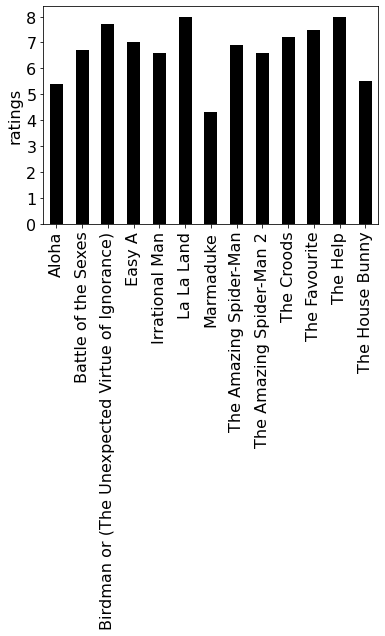

In [10]:
#q4
listofmovies = get_movies("movies.csv", 'mapping.csv')

lldictionary = {}
for i in range(len(listofmovies)):
    if 'Emma Stone' in listofmovies[i]['actors']:
        lldictionary[listofmovies[i]['title']] = listofmovies[i]['rating']
    else:
        continue
        
lldictionary
plot_dict(lldictionary, 'ratings')    

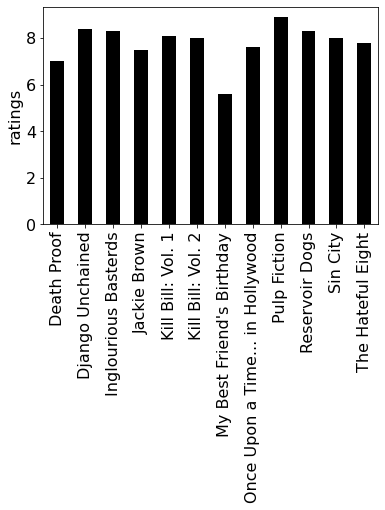

In [11]:
#q5
listofmovies = get_movies("movies.csv", 'mapping.csv')
lldictionary = {}
for i in range(len(listofmovies)):
    if 'Quentin Tarantino' in listofmovies[i]['directors']:
        lldictionary[listofmovies[i]['title']] = listofmovies[i]['rating']
    else:
        continue
        
lldictionary
plot_dict(lldictionary, 'ratings')

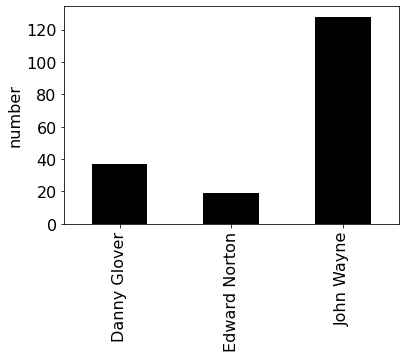

In [12]:
#q6
listofmovies = get_movies("movies.csv", 'mapping.csv')
lldictionary = {}
j=0
e=0
d=0
for i in range(len(listofmovies)):
    if 'John Wayne' in listofmovies[i]['actors']:
        j += 1
        lldictionary['John Wayne'] = j
    if 'Edward Norton' in listofmovies[i]['actors']:
        e += 1
        lldictionary['Edward Norton'] = e
    if 'Danny Glover' in listofmovies[i]['actors']:
        d += 1
        lldictionary['Danny Glover'] = d
    else:
        continue
        
lldictionary
plot_dict(lldictionary, 'number')

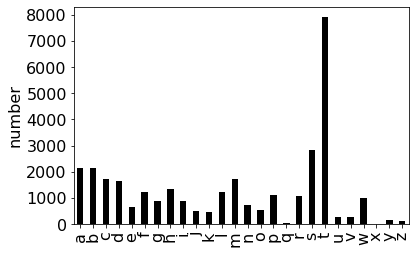

In [13]:
#q7
from operator import itemgetter
listoftitles= (list(map(itemgetter('title'), listofmovies)))
listoftitles = [each_string.lower() for each_string in listoftitles]

counts={}
for line in range(len(listoftitles)):
    letter1 = (listoftitles[line][0])
    if 'a' <= letter1 <= 'z':
        if letter1 not in counts:
            counts[letter1] = 0
        counts[letter1] += 1
        
alphabet = dict(sorted(counts.items()))
plot_dict(alphabet, 'number')

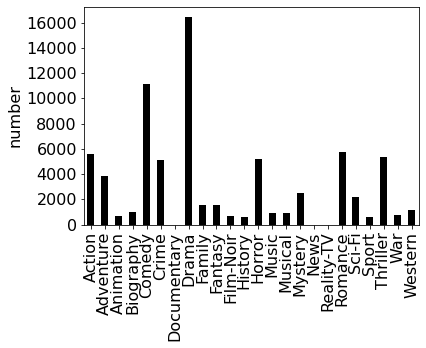

In [14]:
#q8
genre_buckets = {}
for movie in listofmovies:
    for genre in movie['genres']:
        first=genre  
        if not first in genre_buckets:
            genre_buckets[first] = 0
        genre_buckets[first] += 1
        
genre_buckets
            
plot_dict(genre_buckets, 'number')           

In [15]:
#q9
from operator import itemgetter
listoftitles= (list(map(itemgetter('title'), listofmovies)))

listoftitles = [each_string.lower() for each_string in listoftitles]
counts={}
ratings={}
for line in range(len(listoftitles)):
    letter1 = (listoftitles[line][0])
    if 'a' <= letter1 <= 'z':
        if letter1 not in counts:
            counts[letter1] = 0
            ratings[letter1] = 0
        counts[letter1] += 1
        ratings[letter1] += listofmovies[line]['rating']
alphabet = dict(sorted(counts.items()))
ratings = dict(sorted(ratings.items()))

{k: ratings[k]/alphabet[k] for k in alphabet.keys() & ratings}

{'d': 5.306042296072506,
 'e': 5.527586206896553,
 'x': 5.690909090909093,
 'l': 5.681399176954736,
 'w': 5.738674579624128,
 's': 5.5558245614035195,
 'n': 5.538386648122391,
 'f': 5.550164473684206,
 't': 5.768541456016157,
 'o': 5.72813067150635,
 'b': 5.534792734047502,
 'v': 5.301162790697679,
 'c': 5.533487297921478,
 'k': 5.453761061946899,
 'i': 5.661092150170649,
 'q': 5.615254237288137,
 'u': 5.635842293906811,
 'y': 5.845142857142855,
 'j': 5.7286561264822105,
 'r': 5.562799263351744,
 'g': 5.591002277904327,
 'p': 5.537211367673185,
 'm': 5.740911713791118,
 'a': 5.511147540983598,
 'h': 5.565530022238699,
 'z': 5.050943396226414}

In [16]:
#q10
genre_numbers = {}
genre_rate = {}
for movie in listofmovies:
    for genre in movie['genres']:
        first=genre  
        if not first in genre_numbers:
            genre_numbers[first] = 0
            genre_rate[first] = 0
        genre_numbers[first] += 1
        genre_rate[first] += movie['rating']
        
{k: genre_rate[k]/genre_numbers[k] for k in genre_numbers.keys() & genre_rate}

{'Music': 6.07092511013216,
 'History': 6.45741626794258,
 'Biography': 6.608622398414282,
 'Thriller': 5.1262921348314645,
 'Western': 5.996176720475778,
 'Drama': 5.982285191956112,
 'Family': 5.684858044164039,
 'Musical': 6.151965993623801,
 'Documentary': 7.5,
 'Crime': 5.847321780228442,
 'Sci-Fi': 4.901396648044689,
 'Adventure': 5.746479605092239,
 'Mystery': 5.640863251311018,
 'Animation': 6.1353550295857975,
 'News': 6.4,
 'War': 6.190500641848522,
 'Comedy': 5.721581311769968,
 'Fantasy': 5.464606376057261,
 'Film-Noir': 6.638948995363209,
 'Action': 5.338050258420967,
 'Reality-TV': 2.1,
 'Horror': 4.582376811594196,
 'Romance': 6.0585086042065,
 'Sport': 5.914867256637162}

In [17]:
#q11
genre_buckets4 = {}

for movie in range(len(listofmovies)):
    if listofmovies[movie]['rating'] > 8:
        for genre in listofmovies[movie]['genres']:
            first=genre 
            if not first in genre_buckets4:
                genre_buckets4[first] = 0
            genre_buckets4[first] += 1      

genre_buckets4            

{'Action': 40,
 'Adventure': 45,
 'Drama': 155,
 'Biography': 20,
 'Crime': 50,
 'Mystery': 24,
 'Thriller': 32,
 'Comedy': 50,
 'Animation': 12,
 'Family': 10,
 'Sport': 6,
 'History': 12,
 'Musical': 9,
 'Western': 8,
 'Music': 8,
 'Romance': 24,
 'Sci-Fi': 19,
 'Fantasy': 10,
 'Film-Noir': 4,
 'War': 14,
 'Horror': 6}

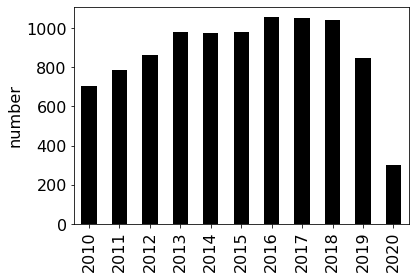

In [18]:
#q12
genre_buckets5 = {}

for i in range(len(listofmovies)):
    if 2020>=listofmovies[i]['year'] and listofmovies[i]['year']>= 2010:
            year=listofmovies[i]['year']
            if not year in genre_buckets5:
                genre_buckets5[year] = 0
            genre_buckets5[year] += 1  

plot_dict(genre_buckets5, 'number')               

In [19]:
#q13
highestyr = []
bestnum = 0
bestyr = None
for year in genre_buckets5: 
    if genre_buckets5[year]>bestnum:
        bestnum = genre_buckets5[year]
        bestyr = year
highestyr.append(bestyr)

for year in genre_buckets5: 
    if year!=bestyr:
        if genre_buckets5[year]==bestnum:
            highestyr.append(year)   

highestyr

[2016]

In [20]:
#q14
genreunique = []
for movie in listofmovies:
    for genre in movie['genres']:
        first=genre  
        if not first in genreunique:
            genreunique.append(first) 

def genre_sort(genre_name):
    genre_numbers=0
    for movie in listofmovies:
        for genre in movie['genres']:
            if genre==genre_name:
                genre_numbers += 1
    return genre_numbers

sorted(genreunique, key = genre_sort)[:3]

['News', 'Documentary', 'Reality-TV']

In [21]:
#q15
sorted(genreunique, key = genre_sort)[-3:][::-1]

['Drama', 'Comedy', 'Romance']

In [22]:
#q16
actors={}
for movie in listofmovies:
    for person in movie['actors']:
        if not person in actors:
            actors[person]=0
        actors[person]+=1

sortdict_actors=dict(sorted(actors.items(),key = lambda x:x[1]))
list(sortdict_actors)[-1]

'John Wayne'

In [23]:
#q17
list(sortdict_actors)[-10:][::-1]

['John Wayne',
 'Eric Roberts',
 'Barbara Stanwyck',
 'William Boyd',
 'Randolph Scott',
 'Robert De Niro',
 'Nicolas Cage',
 'Glenn Ford',
 'Robert Mitchum',
 'Michael Madsen']

In [24]:
#q18
onemovie=0
for i in sortdict_actors:
    if sortdict_actors[i]==1:
        onemovie+=1
        
onemovie

25546

In [25]:
#q19
movie_rates={}
for movie in listofmovies:
    movie_rates[movie['title']]=movie['rating']
    
list(dict(sorted(movie_rates.items(),key = lambda x:x[1])))[-5:][::-1]

['Hopeful Notes',
 'The Moving on Phase',
 'As I Am',
 'The Shawshank Redemption',
 'Love in Kilnerry']

In [26]:
#q20
list(dict(sorted(movie_rates.items(),key = lambda x:x[1])))[:13]

['A Moment of Youth',
 'Proud American',
 'The Time Machine (I Found at a Yardsale)',
 'Troy: The Resurrection of Aeneas',
 'Browncoats: Independence War',
 'C Me Dance',
 'Cries of the Unborn',
 'Captain Battle: Legacy War',
 'Greyhound Attack',
 'The Maize 2: Forever Yours',
 'The Round and Round',
 'Fun in Balloon Land',
 'Rollergator']